In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [113]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [114]:
df=pd.read_csv('Dataa.csv')

In [115]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [116]:
df_copy=df.copy()

In [117]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [118]:
df_copy.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [119]:
df_copy.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

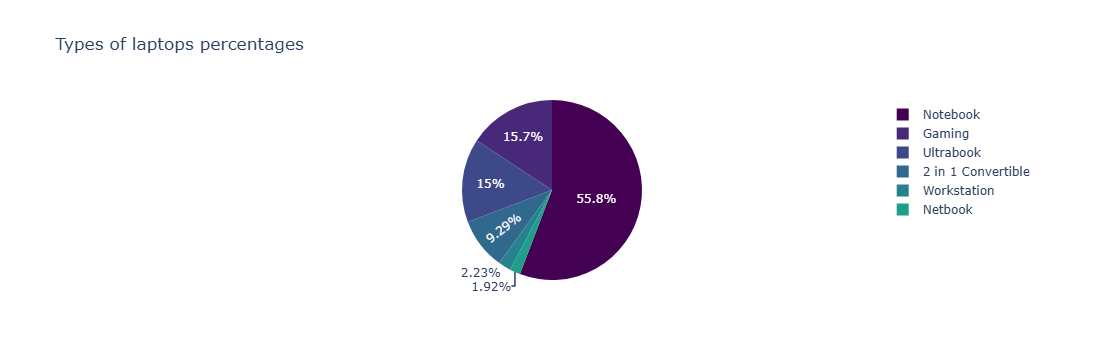

In [120]:
fig=px.pie(df_copy,names='TypeName',title='Types of laptops percentages',color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()

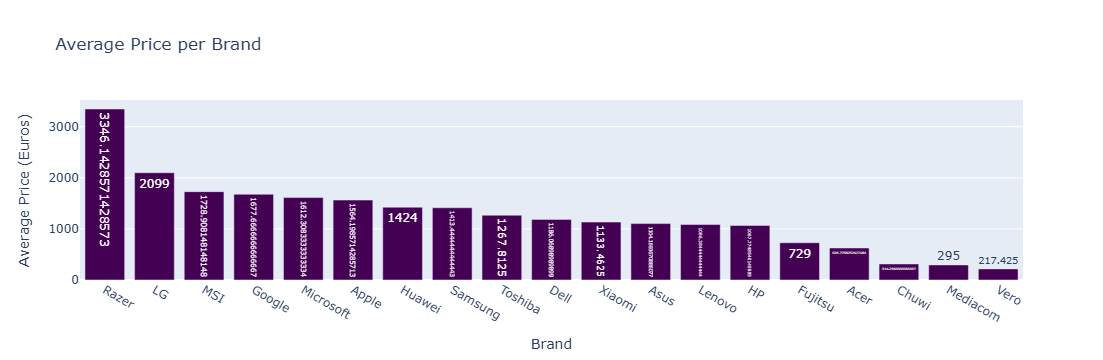

In [121]:
price_vs_brand = df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False).reset_index()

# Create a Plotly bar chart
fig1 = px.bar(price_vs_brand, 
             x='Company', 
             y='Price_euros', 
             title='Average Price per Brand',
             labels={'Price_euros': 'Average Price (Euros)', 'Company': 'Brand'},
             text='Price_euros',
            color_discrete_sequence=px.colors.sequential.Viridis)
fig1.show()

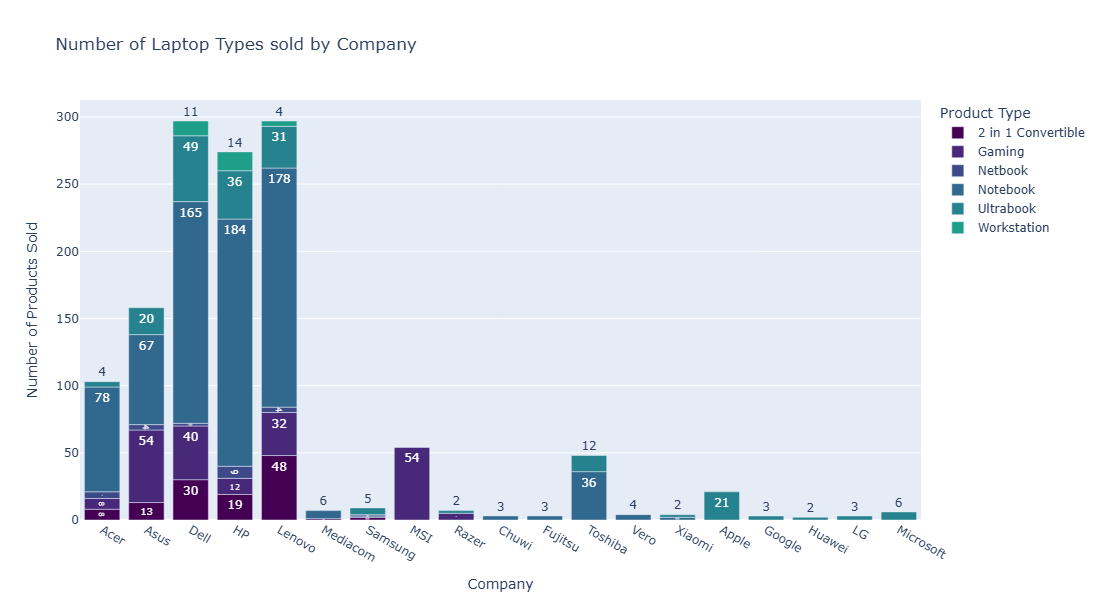

In [122]:
# Group by Company and TypeName and get the count
product_sales_by_type = df.groupby(['Company', 'TypeName']).size().reset_index(name='Count')
fig2 = px.bar(product_sales_by_type, 
             x='Company', 
             y='Count', 
             color='TypeName', 
             title='Number of Laptop Types sold by Company',
             labels={'Count': 'Number of Products Sold', 'TypeName': 'Product Type'},
             text='Count', 
             height=600,
             color_discrete_sequence=px.colors.sequential.Viridis)
fig2.show()

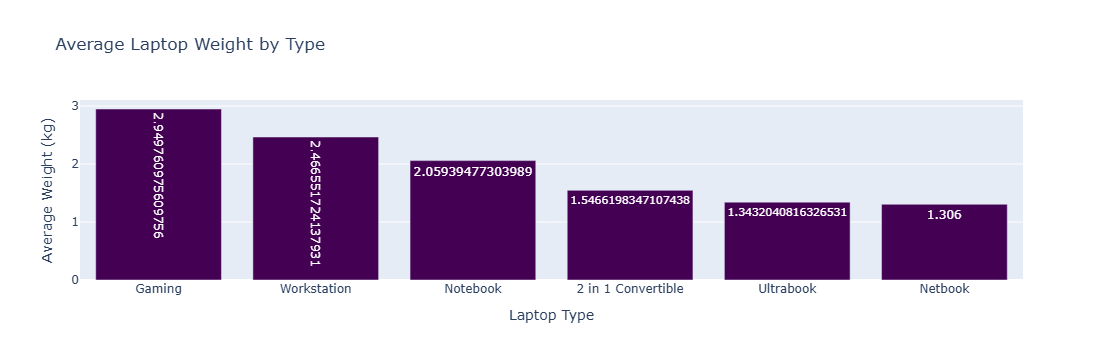

In [123]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
weight_to_type = df.groupby('TypeName')['Weight'].mean().sort_values(ascending=False).reset_index()
fig3 = px.bar(weight_to_type, 
             x='TypeName', 
             y='Weight', 
             title='Average Laptop Weight by Type', 
             labels={'TypeName': 'Laptop Type', 'Weight': 'Average Weight (kg)'}, 
             text='Weight',color_discrete_sequence=px.colors.sequential.Viridis)
fig3.show()

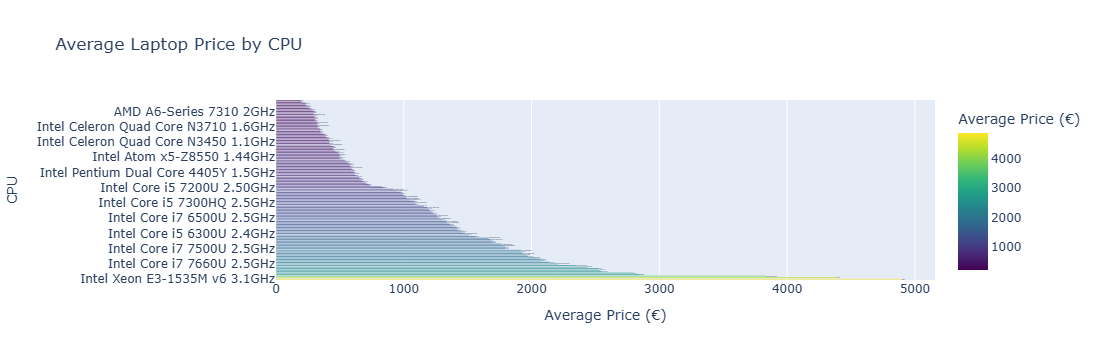

In [152]:
price_to_gpu = df.groupby('Cpu')['Price_euros'].mean().sort_values(ascending=False).reset_index()

# Create the bar chart
fig4 = px.bar(price_to_gpu, 
               x='Price_euros', 
               y='Cpu', 
               title='Average Laptop Price by CPU', 
               labels={'Cpu': 'CPU', 'Price_euros': 'Average Price (€)'}, 
               color='Price_euros',  # Color bars by price
               text='Price_euros',   # Add data labels
               color_continuous_scale=px.colors.sequential.Viridis) 

fig4.show()

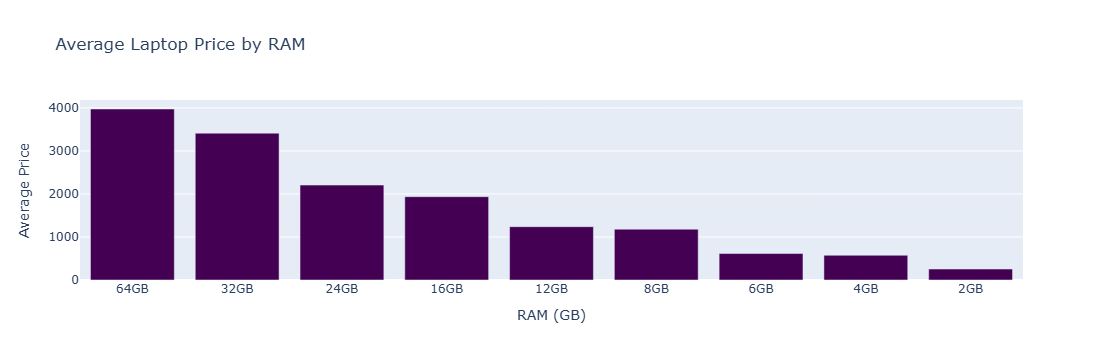

In [137]:
# Calculate average price by RAM
price_to_ram = df.groupby('Ram')['Price_euros'].mean().sort_values(ascending=False).reset_index()

# Create the bar chart
fig5= px.bar(price_to_ram, 
               x='Ram', 
               y='Price_euros', 
               title='Average Laptop Price by RAM',
               labels={'Ram': 'RAM (GB)', 'Price_euros': 'Average Price'},
             color_discrete_sequence=px.colors.sequential.Viridis)

# Show the plot
fig5.show()

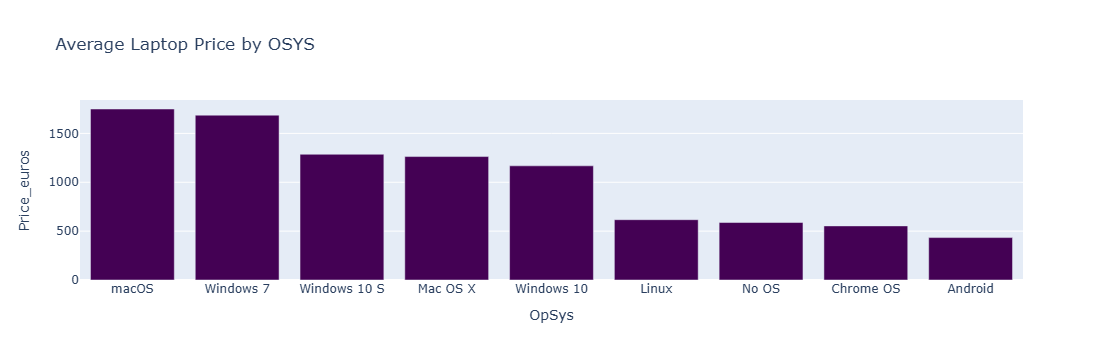

In [139]:
price_to_osys= df.groupby('OpSys')['Price_euros'].mean().sort_values(ascending=False).reset_index()

# Create the bar chart
fig6 = px.bar(price_to_osys, 
               x='OpSys', 
               y='Price_euros', 
               title='Average Laptop Price by OSYS',
               color_discrete_sequence=px.colors.sequential.Viridis)

# Show the plot
fig6.show()

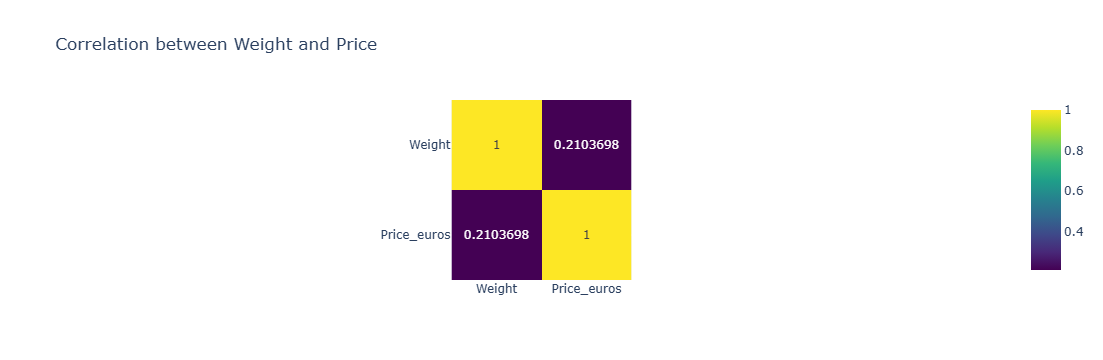

In [141]:
correlation_weight_price = df[['Weight', 'Price_euros']].corr()

fig8 = px.imshow(correlation_weight_price, 
                 text_auto=True, 
                 title='Correlation between Weight and Price',color_continuous_scale=px.colors.sequential.Viridis)

fig8.show()

In [143]:
import dash
from dash import dcc, html

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div(children=[
    html.H1(children='Laptops Dashboard'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),
    
    dcc.Graph(id='Types of laptops percentages', figure=fig),
    dcc.Graph(id='Average Price per Brand', figure=fig1),
    dcc.Graph(id='Number of Laptop Types sold by Company', figure=fig2),
    dcc.Graph(id='Average Laptop Weight by Type', figure=fig3),
    dcc.Graph(id='Average Laptop Price by CPU', figure=fig4),
    dcc.Graph(id='Average Laptop Price by RAM', figure=fig5),
    dcc.Graph(id='Average Laptop Price by OSYS', figure=fig6),
    
    
    
    
])

app.run_server(port=8052)